In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
np.random.seed(123)

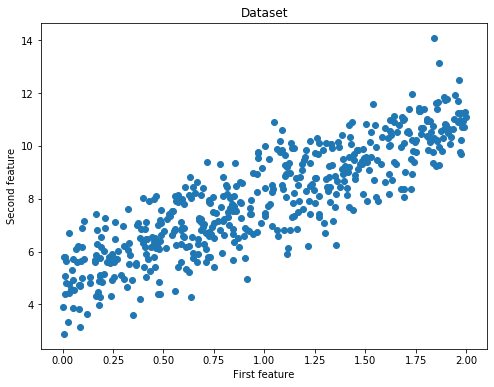

In [56]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [57]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [82]:
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []
        # Step 1: Loop until iterate enough
        # J(w,b) = 1/2m*Sum(Pow(w*X+b-y),2)
        # d/dw(J(w,b)) = 1/m*Sum(w*X+b-y)*x
        # d/db(J(w,b)) = 1/m*Sum(w*X+b-y)
        for k in range(n_iters):
            h_x = np.dot(X, self.weights) + self.bias
            e = h_x - y  
            cost = (1 / n_samples) * np.sum(e**2)
            costs.append(cost)
            if k % 100 == 0:
                print(f"Cost at iteration {k}: {cost}")
#             print('sum(h_x - y):', np.sum(e))
#            # wrong impl: X should be TRANSFORMED
#             for i in range(0, n_features):
#                 self.weights[i] -= learning_rate * 1.0 / n_samples * np.dot(X[i], e[i])
            self.weights -= learning_rate * 1.0 / n_samples * np.dot(X.T, e)
            self.bias -= learning_rate * 1.0 / n_samples * np.sum(e)
        return self.weights, self.bias, costs
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [84]:
linear_regression = LinearRegression()
linear_regression.train_gradient_descent(X_train, y_train, 0.05, 1000)

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 1.1209328628287667
Cost at iteration 200: 1.0441161984334848
Cost at iteration 300: 1.0274388666711065
Cost at iteration 400: 1.0238181233031574
Cost at iteration 500: 1.0230320393705876
Cost at iteration 600: 1.0228613760878718
Cost at iteration 700: 1.0228243241206956
Cost at iteration 800: 1.022816279928355
Cost at iteration 900: 1.022814533488548


(array([[3.0481988]]),
 4.897785032807911,
 [66.45256981003433,
  53.26349101421134,
  42.748831054763826,
  34.36604270568163,
  27.68264649599188,
  22.353900965531327,
  18.105003017381637,
  14.716899333778144,
  12.014976269097504,
  9.860044255349981,
  8.141151226103997,
  6.769854000835554,
  5.675651849255373,
  4.802346460960676,
  4.105140378012119,
  3.54832407642861,
  3.1034322757732133,
  2.7477742832354135,
  2.4632624908018794,
  2.235478538378076,
  2.052928926915342,
  1.9064516472997233,
  1.7887431880197187,
  1.693981500039239,
  1.6175254517739643,
  1.5556752564138878,
  1.5054815019649528,
  1.464592923843021,
  1.4311350602125863,
  1.4036135248034625,
  1.3808369029905898,
  1.3618552901122218,
  1.345911298643194,
  1.3324010046329946,
  1.3208428170032718,
  1.3108526623731387,
  1.3021242041644046,
  1.2944130746691482,
  1.2875243059595471,
  1.2813023106826538,
  1.275622895438552,
  1.2703868943867231,
  1.2655150943810547,
  1.2609441896181184,
  1.256

Error on training set: 1.0228
Error on test set: 1.0


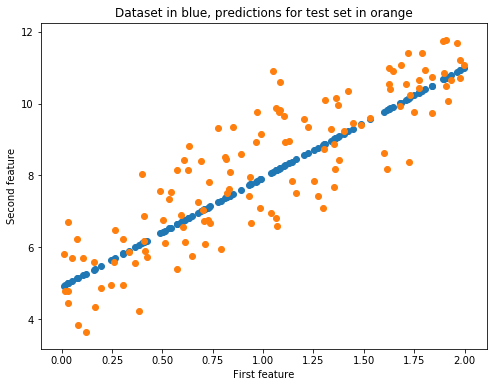

In [90]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = linear_regression.predict(X_train)
y_p_test = linear_regression.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
# plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.scatter(X_test, y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()